# Ames
___
## Imports / Reads

In [77]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
pd.set_option('display.max_columns', 100)

In [79]:
df = pd.read_csv('../../Data/Ames/train.csv')
test_df = pd.read_csv('../../Data/Ames/test.csv')

___
## Cleaning

In [80]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [81]:
df.shape

(2051, 81)

In [82]:
columns = set(df.columns)
columns

{'1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Alley',
 'Bedroom AbvGr',
 'Bldg Type',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Condition 1',
 'Condition 2',
 'Electrical',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st',
 'Exterior 2nd',
 'Fence',
 'Fireplace Qu',
 'Fireplaces',
 'Foundation',
 'Full Bath',
 'Functional',
 'Garage Area',
 'Garage Cars',
 'Garage Cond',
 'Garage Finish',
 'Garage Qual',
 'Garage Type',
 'Garage Yr Blt',
 'Gr Liv Area',
 'Half Bath',
 'Heating',
 'Heating QC',
 'House Style',
 'Id',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Land Contour',
 'Land Slope',
 'Lot Area',
 'Lot Config',
 'Lot Frontage',
 'Lot Shape',
 'Low Qual Fin SF',
 'MS SubClass',
 'MS Zoning',
 'Mas Vnr Area',
 'Mas Vnr Type',
 'Misc Feature',
 'Misc Val',
 'Mo Sold',
 'Neighborhood',
 'Open Porch SF',
 'Overall Cond',
 'Overall

___
### Missing Data

In [83]:
df.isnull().sum().sort_values(ascending=False)

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Finish       114
Garage Cond         114
Garage Qual         114
Garage Yr Blt       114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
BsmtFin Type 1       55
Bsmt Cond            55
Bsmt Qual            55
Mas Vnr Type         22
Mas Vnr Area         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Cars           1
Garage Area           1
Bsmt Unf SF           1
BsmtFin SF 2          1
Total Bsmt SF         1
BsmtFin SF 1          1
Overall Cond          0
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
Roof Style            0
Year Remod/Add        0
Year Built            0
SalePrice             0
Overall Qual          0
Land Contour          0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Area              0
Street                0
Lot Shape       

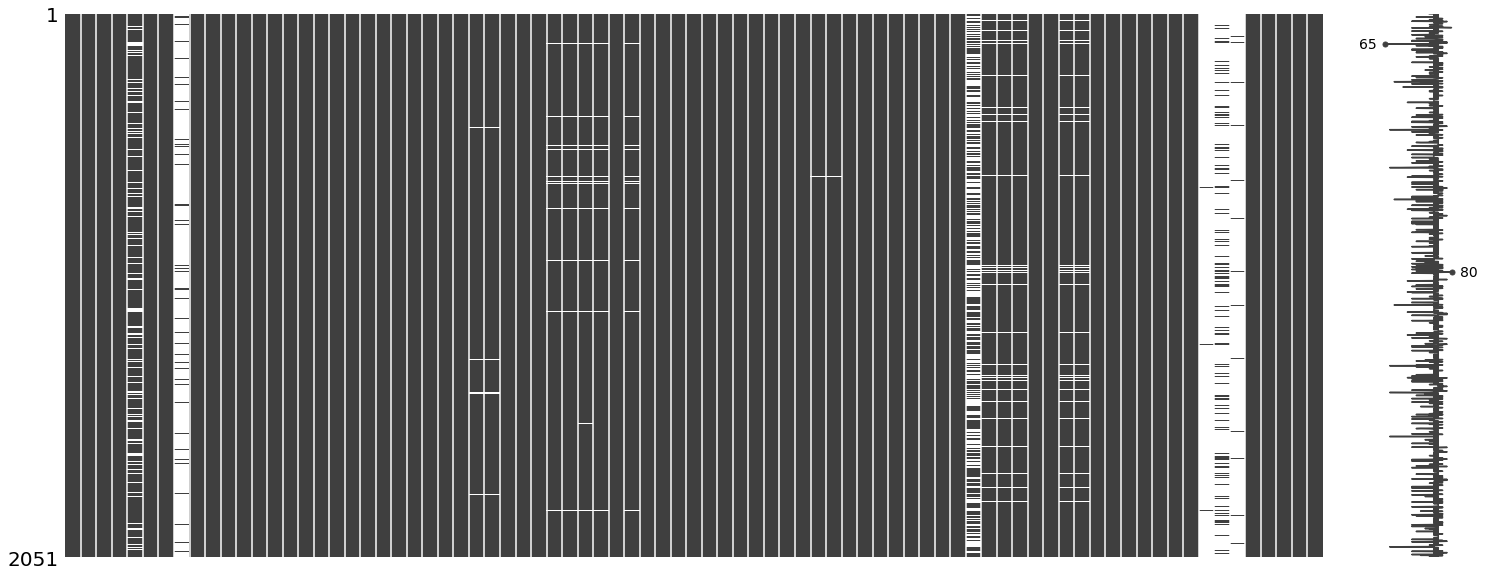

In [84]:
msno.matrix(df);

In [85]:
# lets get a list of how many missing values are in each column with missing values?
def null_check(cols):
    for col in cols:
        if df[col].isnull().sum() > 0:
            print(f'{col} has {df[col].isnull().sum()} null(s)')
            
null_check(columns)

Garage Yr Blt has 114 null(s)
BsmtFin Type 2 has 56 null(s)
Mas Vnr Type has 22 null(s)
Total Bsmt SF has 1 null(s)
Garage Cond has 114 null(s)
BsmtFin Type 1 has 55 null(s)
BsmtFin SF 2 has 1 null(s)
Garage Qual has 114 null(s)
Bsmt Exposure has 58 null(s)
Misc Feature has 1986 null(s)
Fence has 1651 null(s)
Fireplace Qu has 1000 null(s)
Lot Frontage has 330 null(s)
Garage Cars has 1 null(s)
Bsmt Half Bath has 2 null(s)
Garage Area has 1 null(s)
BsmtFin SF 1 has 1 null(s)
Bsmt Cond has 55 null(s)
Garage Type has 113 null(s)
Bsmt Qual has 55 null(s)
Garage Finish has 114 null(s)
Bsmt Full Bath has 2 null(s)
Bsmt Unf SF has 1 null(s)
Mas Vnr Area has 22 null(s)
Alley has 1911 null(s)
Pool QC has 2042 null(s)


Out of all the columns that have null values, the categorical columns can be imputed as 'None' because those houses do not have those features.

In [86]:
cat_cols = [
    'Alley',
    'Mas Vnr Type', 
    'Bsmt Qual', 
    'Bsmt Cond', 
    'Bsmt Exposure', 
    'BsmtFin Type 1', 
    'BsmtFin Type 2', 
    'Fireplace Qu', 
    'Garage Type', 
    'Garage Finish', 
    'Garage Qual', 
    'Garage Cond', 
    'Pool QC', 
    'Fence', 
    'Misc Feature'
]

[df[col].fillna('None', inplace=True) for col in cat_cols]
    
null_check(columns)

Garage Yr Blt has 114 null(s)
Total Bsmt SF has 1 null(s)
BsmtFin SF 2 has 1 null(s)
Lot Frontage has 330 null(s)
Garage Cars has 1 null(s)
Bsmt Half Bath has 2 null(s)
Garage Area has 1 null(s)
BsmtFin SF 1 has 1 null(s)
Bsmt Full Bath has 2 null(s)
Bsmt Unf SF has 1 null(s)
Mas Vnr Area has 22 null(s)


Next the nulls for the basement features can be set to 0 because those houses do not have basements

In [87]:
n_index = df.loc[df['Total Bsmt SF'].isnull()].index
df.loc[n_index, 'Total Bsmt SF'] = 0

n_index = df.loc[df['BsmtFin SF 1'].isnull()].index
df.loc[n_index, 'BsmtFin SF 1'] = 0

n_index = df.loc[df['BsmtFin SF 2'].isnull()].index
df.loc[n_index, 'BsmtFin SF 2'] = 0

n_index = df.loc[df['Bsmt Full Bath'].isnull()].index
df.loc[n_index, 'Bsmt Full Bath'] = 0

n_index = df.loc[df['Bsmt Unf SF'].isnull()].index
df.loc[n_index, 'Bsmt Unf SF'] = 0

n_index = df.loc[df['Bsmt Half Bath'].isnull()].index
df.loc[n_index, 'Bsmt Half Bath'] = 0

In [88]:
null_check(columns)

Garage Yr Blt has 114 null(s)
Lot Frontage has 330 null(s)
Garage Cars has 1 null(s)
Garage Area has 1 null(s)
Mas Vnr Area has 22 null(s)


Now to deal with the Garage Cars and Garage Area nulls. For these nulls I can impute them as the median for the type of garage in the same area. This won't be 100% accurate but it will be a good estimate

In [89]:
df.loc[df['Garage Cars'].isnull()]['Garage Type']

1712    Detchd
Name: Garage Type, dtype: object

In [90]:
df.loc[df['Garage Cars'].isnull()]['Neighborhood']

1712    IDOTRR
Name: Neighborhood, dtype: object

In [91]:
df.loc[(df['Garage Type'] == 'Detchd') & (df['Neighborhood'] == 'IDOTRR')]['Garage Cars'].median()

1.0

In [92]:
df.loc[1712, 'Garage Cars'] = 1

In [93]:
null_check(columns)

Garage Yr Blt has 114 null(s)
Lot Frontage has 330 null(s)
Garage Area has 1 null(s)
Mas Vnr Area has 22 null(s)


In [94]:
df.loc[df['Garage Area'].isnull()]['Garage Type']

1712    Detchd
Name: Garage Type, dtype: object

In [95]:
df.loc[df['Garage Area'].isnull()]['Neighborhood']

1712    IDOTRR
Name: Neighborhood, dtype: object

In [96]:
df.loc[(df['Garage Type'] == 'Detchd') & (df['Neighborhood'] == 'IDOTRR')]['Garage Area'].median()

338.0

In [97]:
df.loc[1712, 'Garage Area'] = 338

In [98]:
null_check(columns)

Garage Yr Blt has 114 null(s)
Lot Frontage has 330 null(s)
Mas Vnr Area has 22 null(s)


In [99]:
n_index = df.loc[df['Mas Vnr Area'].isnull()].index
df.iloc[n_index]['Mas Vnr Type']

22      None
41      None
86      None
212     None
276     None
338     None
431     None
451     None
591     None
844     None
913     None
939     None
1025    None
1244    None
1306    None
1430    None
1434    None
1606    None
1699    None
1815    None
1820    None
1941    None
Name: Mas Vnr Type, dtype: object

Our Mas Vnr Area nulls can be set to 0 because none of them have Masonry Veneer

In [100]:
df.loc[n_index, 'Mas Vnr Area'] = 0
null_check(columns)

Garage Yr Blt has 114 null(s)
Lot Frontage has 330 null(s)


In [101]:
# here we are setting all the nulls . for Garage Year Built to be 0 where there is no garage
n_index = df.loc[(df['Garage Yr Blt'].isnull()) & (df['Garage Type'] == 'None')].index
df.loc[n_index, 'Garage Yr Blt'] = 0

null_check(columns)

Garage Yr Blt has 1 null(s)
Lot Frontage has 330 null(s)


In [102]:
df.loc[df['Garage Yr Blt'].isnull()][['Garage Type', 'Neighborhood']]

,Garage Type,Neighborhood
1712,Detchd,IDOTRR


In [103]:
df.loc[(df['Garage Type'] == 'Detchd') & (df['Neighborhood'] == 'IDOTRR')]['Garage Yr Blt'].median()

1942.0

again we're just going to impute this missing value as the median year for houses in that area with a detached garage

In [104]:
df.loc[1712, 'Garage Yr Blt'] = 1942
null_check(columns)

Lot Frontage has 330 null(s)


We're going to repeat the same process for Lot Frontage as well

In [105]:
# Filling in nulls for Lot Frontage

mini_df = df.loc[df['Lot Frontage'].isnull()][['Lot Area', 'Neighborhood', 'Lot Shape', 'Lot Config']]

while mini_df.shape[0] > 0:
    
    # get the values from the first entry in the list
    nhood = mini_df['Neighborhood'].values[0]
    lshape = mini_df['Lot Shape'].values[0]
    lconfig = mini_df['Lot Config'].values[0]
    
    # get the median Lot Frontage value for places matching the values of the first in the mini df
    n_index = df.loc[(df['Neighborhood'] == nhood) &
                 (df['Lot Shape'] == lshape) &
                 (df['Lot Config'] == lconfig)
                ].index
    
    lfrontage_median = df.loc[n_index, 'Lot Frontage'].median()
    
    # if our Lot Frontage median is nan we will broaden our scopes to get a numerical median
    if math.isnan(lfrontage_median):
        n_index = df.loc[(df['Neighborhood'] == nhood) &
                         (df['Lot Config'] == lconfig)
                        ].index
        lfrontage_median = df.loc[n_index, 'Lot Frontage'].median()
        
    # try a secondary method if our Lot Frontage median is still nan
    if math.isnan(lfrontage_median):
        n_index = df.loc[(df['Lot Shape'] == lshape) &
                         (df['Lot Config'] == lconfig)
                        ].index
        lfrontage_median = df.loc[n_index, 'Lot Frontage'].median()
        
    # impute nulls
    n_index = df.loc[(df['Lot Frontage'].isnull()) &
                 (df['Neighborhood'] == nhood) &
                 (df['Lot Shape'] == lshape) &
                 (df['Lot Config'] == lconfig)
                ].index
    df.loc[n_index, 'Lot Frontage'] = lfrontage_median
    
    # reset mini df
    mini_df = df.loc[df['Lot Frontage'].isnull()][['Lot Area', 'Neighborhood', 'Lot Shape', 'Lot Config']]

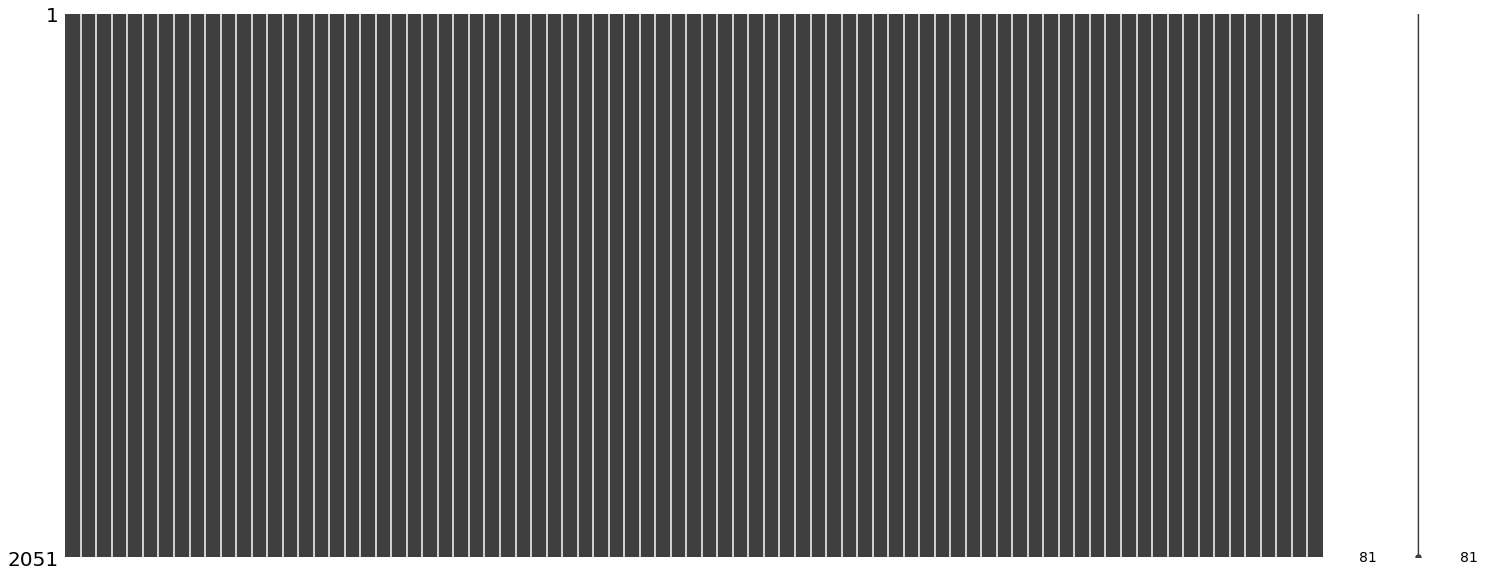

In [106]:
msno.matrix(df);

In [107]:
# save cleaned version
df.to_csv('../../Data/Ames/cleaned.csv', index=False)

___
## EDA

In [108]:
# Let's get a list of all our categorical data
cat_list = [df.dtypes.index[i] for i in range(len(df.dtypes)) if df.dtypes[i] == 'object']

# now we can check each categorical for any anomolies
for col in cat_list:
    print(col)
    print(df[col].unique())
    print('-----------')

MS Zoning
['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
-----------
Street
['Pave' 'Grvl']
-----------
Alley
['None' 'Pave' 'Grvl']
-----------
Lot Shape
['IR1' 'Reg' 'IR2' 'IR3']
-----------
Land Contour
['Lvl' 'HLS' 'Bnk' 'Low']
-----------
Utilities
['AllPub' 'NoSeWa' 'NoSewr']
-----------
Lot Config
['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
-----------
Land Slope
['Gtl' 'Sev' 'Mod']
-----------
Neighborhood
['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
-----------
Condition 1
['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
-----------
Condition 2
['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
-----------
Bldg Type
['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
-----------
House Style
['2Story' '1Story' '1.5Fin' 'SFoyer' 

Nothing out of the ordinary when it comes to categorical data. I will eventually turn all of the categorical data into numerical data, but for now I'm just checking if anything is unexpected

In [109]:
# df['Central Air'] = df['Central Air'].map({'Y':1, 'N':0})

In [110]:
# Now let's make a list of our numerical data
num_list = df._get_numeric_data().columns
len(num_list)

39

In [111]:
df.shape

(2051, 81)

In [112]:
len(num_list) + len(cat_list)

81

We've covered all our columns, but I'd like to now remove unwanted columns from our numerical list. i.e. SalePrice (that's what we're trying to predict), Id (not relevant), and PID (also not relevant)

In [113]:
unwanted = ['SalePrice', 'Id', 'PID']
num_list = [ele for ele in num_list if ele not in unwanted]

Now to check the numerical data for any potentially incorrect data.

In [114]:
# check our target
df['SalePrice'].sort_values(ascending=False)

1671    611657
1964    591587
1692    584500
1796    582933
151     556581
         ...  
1518     35311
1292     35000
1309     34900
183      13100
1628     12789
Name: SalePrice, Length: 2051, dtype: int64

In [115]:
# make a function to check the correlation between a list of features and the target
def check_corr(df, features, target):
    
    # combine the features and the target into one list for the heatmap
    hm_list = features + [target]
    
    # plot the correlations between features and the target
    plt.figure(figsize=(2, len(features)/2))
    sns.heatmap(df[hm_list].corr()[[target]].sort_values(by=target, ascending=False),
                vmin=-1,
                vmax=1,
                cmap='coolwarm',
                annot=True
               );

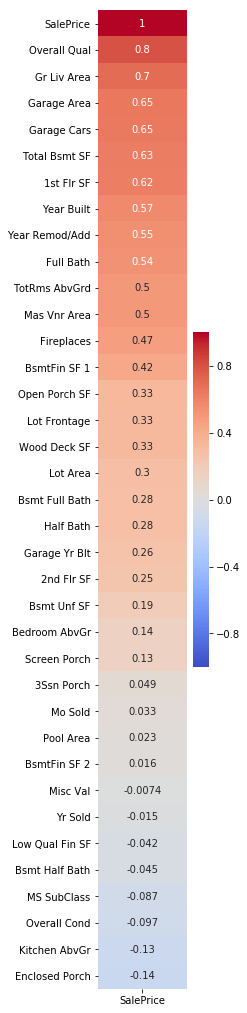

In [116]:
check_corr(df, num_list, 'SalePrice')

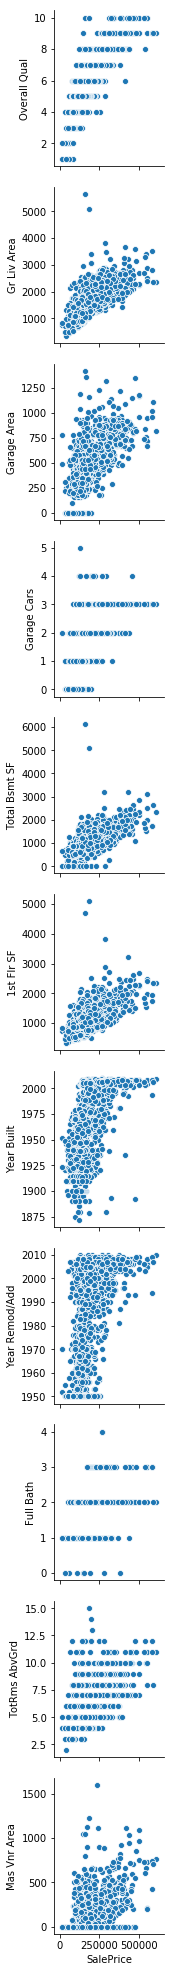

In [117]:
sns.pairplot(df, 
             x_vars=['SalePrice'], 
             y_vars=['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
                     'Year Built', 'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area'
                    ]
            );

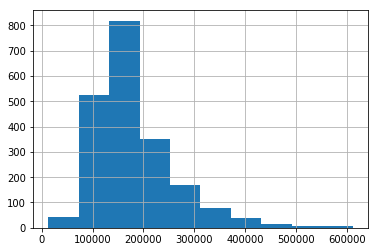

In [118]:
df['SalePrice'].hist();

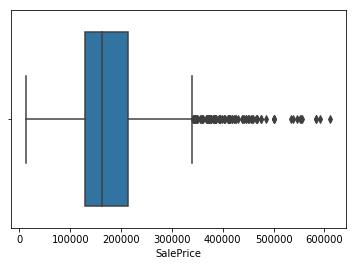

In [119]:
sns.boxplot(df['SalePrice']);

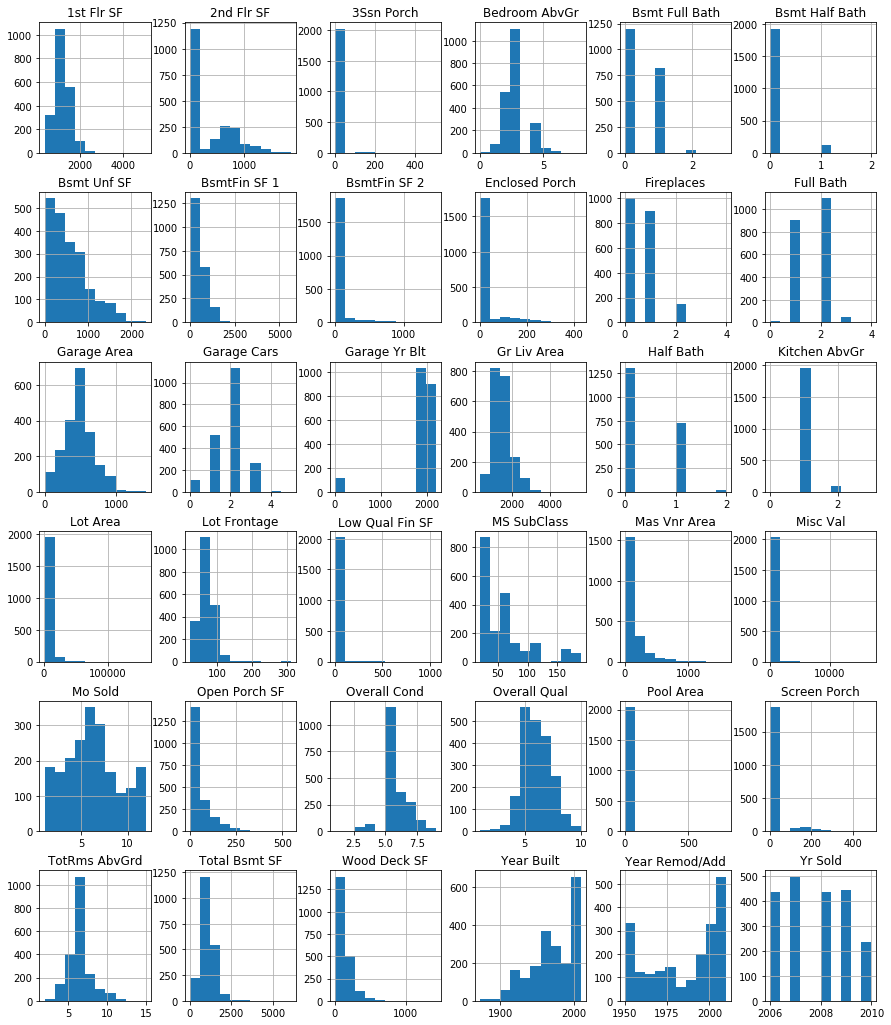

In [120]:
plt.tight_layout;
df[num_list].hist(figsize=(15,18));

Now let's convert all of out categorical data into numerical data

___

## Modeling

In [121]:
# Let's make a function to build a linear model
def make_lr_model(df, features, target):
    # define our X and y (predictors and target)
    X = df[features]
    y = df[target]
    
    # train test split
    X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, random_state=42)
    
    # inst and fit
    mlr = LinearRegression()
    mlr.fit(X_train,y_train)
    
    # print out some info about our model
    
    print('--------------------------------------------------')
    print(f'R2 for training score: {mlr.score(X_train,y_train)}')
    print(f'R2 for holdout score: {mlr.score(X_holdout,y_holdout)}')
    print('--------------------------------------------------')
    print(f'Average Cross Val Score(cv=15): {cross_val_score(mlr, X_holdout, y_holdout, cv=15).mean()}')
    print('--------------------------------------------------')
    
    # refit the model to our entire data frame
    mlr = LinearRegression()
    mlr.fit(X,y)
    
    for i, name in enumerate(features):
        print(f'{name}\'s coefficient: {mlr.coef_[i]}')
    print('--------------------------------------------------')
    print(f'y intercept: {mlr.intercept_}')
    print('--------------------------------------------------')
    print(f'RMSE: {np.sqrt(mean_squared_error(y, mlr.predict(X)))}') # root mean square error for entire dataset
    print('--------------------------------------------------')

In [122]:
# model with all our numerical data
make_lr_model(df, num_list, 'SalePrice')

--------------------------------------------------
R2 for training score: 0.8303221305896838
R2 for holdout score: 0.8633915831062905
--------------------------------------------------
Average Cross Val Score(cv=15): 0.8749564139580362
--------------------------------------------------
MS SubClass's coefficient: -152.9737971847373
Lot Frontage's coefficient: -41.0983009148552
Lot Area's coefficient: 0.5681662844978703
Overall Qual's coefficient: 17417.758913556387
Overall Cond's coefficient: 3845.414077497625
Year Built's coefficient: 351.63499160552396
Year Remod/Add's coefficient: 197.97213411023444
Mas Vnr Area's coefficient: 32.76803927878843
BsmtFin SF 1's coefficient: 10.339836440961047
BsmtFin SF 2's coefficient: 1.0510150361649384
Bsmt Unf SF's coefficient: -2.177084695065946
Total Bsmt SF's coefficient: 9.213766780944209
1st Flr SF's coefficient: 22.592150753498185
2nd Flr SF's coefficient: 17.555747357210677
Low Qual Fin SF's coefficient: -12.976618440675342
Gr Liv Area's coe

Not a bad place to start. We should focus on feature engineering to help reduce our RMSE and improve our base model.

In [123]:
# model with numerical data that has a correlation with Sale Price of at least .5
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
            'Year Built', 'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area']
make_lr_model(df, features, 'SalePrice')

--------------------------------------------------
R2 for training score: 0.7823634774211837
R2 for holdout score: 0.8400837279812203
--------------------------------------------------
Average Cross Val Score(cv=15): 0.8441015637857986
--------------------------------------------------
Overall Qual's coefficient: 19117.02280078419
Gr Liv Area's coefficient: 45.15480695689348
Garage Area's coefficient: 29.988861342455223
Garage Cars's coefficient: 5890.098980970819
Total Bsmt SF's coefficient: 15.709370198410646
1st Flr SF's coefficient: 17.356316906674508
Year Built's coefficient: 222.72300745815733
Year Remod/Add's coefficient: 376.6660885423525
Full Bath's coefficient: -6121.4891471564415
TotRms AbvGrd's coefficient: -118.70332628217714
Mas Vnr Area's coefficient: 40.08727099676514
--------------------------------------------------
y intercept: -1244623.0465980268
--------------------------------------------------
RMSE: 35640.371328855756
---------------------------------------------

This model actually performed worse, which tells me there are other important features that are not highly correlated to Sale Price